
# Project: No-showing in appointments


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



in this project we are going yo invistigate why would peaple dont show in medical appointment by using data collected from 100k medical appointments in Brazil

to download https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv.

i renamed the file to 'noshow.csv'

In [87]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 

In [88]:
df = pd.read_csv('noshow.csv')

In [89]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Quistions

we are going to investigate the data to answer 3 quistions:

1 if the deffrance between ScheduledDay and AppointmentDay were big will that effect in showing

2 whats is the range of ages that dont show the most

3 are the location of hospital makes big diffrance

<a id='wrangling'></a>
## Data Wrangling

know we are going to wrangle the data so we can answer quistions clearly
### General Properties

In [90]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No




### finding  nulll, duplicates and proper data types

In [91]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [92]:
df.duplicated().sum()

0

we can drop first to columns since they are useless in our situation

In [93]:
df.drop(columns = ['PatientId','AppointmentID'], inplace = True)

there seams to be no null or duplicate rows, and thats nice 
but there is some problems in data, witch is:

<ul>
    <li>dates are in string format</li>
    <li>there is no column for differance in days</li>
    <li>No-show column is so confusing in this shape</li>
</ul>
    


## solve first problem

In [94]:
# extract date only without time
df['AppointmentDay'] = df['AppointmentDay'].apply(lambda x: x[:10])
df['ScheduledDay'] = df['ScheduledDay'].apply(lambda x: x[:10])

#change date to time
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])



In [95]:
df.dtypes
#thats better

Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No-show                   object
dtype: object

## second problem



In [96]:

# find deffrance between AppointmentDay and ScheduledDay
diff = df['AppointmentDay']-df['ScheduledDay']
diff = diff.apply(lambda x: int(str(x)[:str(x).index(' ')]))
df['diff'] = diff

In [97]:

df['diff'].unique()
# there are some negative values, but why? lets find out

array([  0,   2,   3,   1,   4,   9,  29,  10,  23,  11,  18,  17,  14,
        28,  24,  21,  15,  16,  22,  43,  30,  31,  42,  32,  56,  45,
        46,  39,  37,  38,  44,  50,  60,  52,  53,  65,  67,  91,  66,
        84,  78,  87, 115, 109,  63,  70,  72,  57,  58,  51,  59,  41,
        49,  73,  64,  20,  33,  34,   6,  35,  36,  12,  13,  40,  47,
         8,   5,   7,  25,  26,  48,  27,  19,  61,  55,  62, 176,  54,
        77,  69,  83,  76,  89,  81, 103,  79,  68,  75,  85, 112,  -1,
        80,  86,  98,  94, 142, 155, 162, 169, 104, 133, 125,  96,  88,
        90, 151, 126, 127, 111, 119,  74,  71,  82, 108, 110, 102, 122,
       101, 105,  92,  97,  93, 107,  95,  -6, 139, 132, 179, 117, 146,
       123], dtype=int64)

In [99]:
negative_diff = df[df['diff'] < 0]
negative_diff

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,diff
27033,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1
55226,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1
64175,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1
71533,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6
72362,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1


the problem seams to be that are some error in AppointmentDay and ScheduledDay columns. 
AppointmentDay should be always bigger than ScheduledDay, but in these 5 columns its the oppesite, so we are going to drop it 

In [100]:
df.drop(index = negative_diff.index, inplace = True)

In [101]:
#check 
df[df['diff'] < 0]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,diff


## third problem
the column is too missy in this shape, so we are going to reshape it to
<ul>
   <li>column name = show</li>
   <li>if patient showed it will be 1 if he don't it will be 0</li>
</ul>

In [102]:
df.rename(columns ={'No-show':'show'}, inplace =True)


In [103]:
# change yes to no

yes = df['show'] == 'Yes'
yes_column = df[yes]['show']

no_column = yes_column.apply(lambda x: 0)

In [104]:
# now every yes now is no, and every no is Nan
df['show'] = no_column

In [105]:
#replace Nans with yes = 1
df['show'].fillna(1, inplace = True)

In [106]:
#check
df['show'] = df['show'].astype(int)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,show,diff
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,0


## Every thing is wrangled now and ready yo be used!  
lets look final look to the data types 

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110522 entries, 0 to 110526
Data columns (total 13 columns):
Gender            110522 non-null object
ScheduledDay      110522 non-null datetime64[ns]
AppointmentDay    110522 non-null datetime64[ns]
Age               110522 non-null int64
Neighbourhood     110522 non-null object
Scholarship       110522 non-null int64
Hipertension      110522 non-null int64
Diabetes          110522 non-null int64
Alcoholism        110522 non-null int64
Handcap           110522 non-null int64
SMS_received      110522 non-null int64
show              110522 non-null int32
diff              110522 non-null int64
dtypes: datetime64[ns](2), int32(1), int64(8), object(2)
memory usage: 11.4+ MB


In [108]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,show,diff
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,0


<a id='eda'></a>
## Exploratory Data Analysis

in this section we will explore the data to find answers to our quistion


### Research Question 1 (if the deffrance between ScheduledDay and AppointmentDay were big will that effect in showing)

In [111]:
#get a general idea about data
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,show,diff
count,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000
mean,37.089041,0.098270,0.197255,0.071868,0.030401,0.022231,0.321040,0.798104,10.184253
std,23.110064,0.297681,0.397928,0.258270,0.171689,0.161493,0.466878,0.401417,15.255115
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,15.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,179.000000


to begin we will make some masks for showing or missing the appointment

In [112]:
showed = df['show'] == 1
missed = df['show'] == 0

In [113]:
#how much is the differance in days in average fow peaple showing
df['diff'][showed].mean()

8.754659441320515

In [114]:
##how much is the differance in days in average fow peaple missing
df['diff'][missed].mean()

15.835484449224701

there seam to be a deffrance in average days of (diff) between peaple who show and people who miss, such that people who miss have higher average. 

lets show that graphically

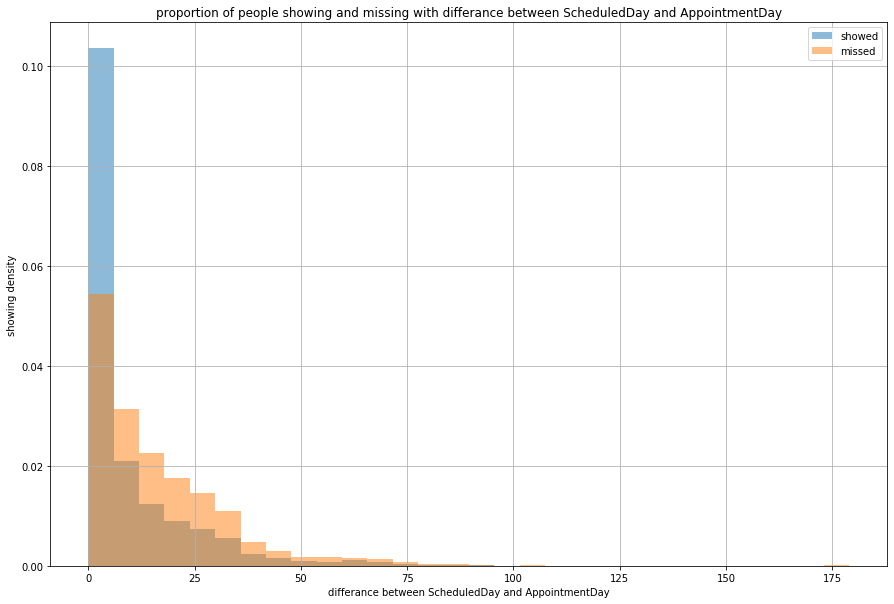

In [115]:
df['diff'][showed].hist(alpha = 0.5, label = 'showed', density =True, bins= 30, figsize = (15,10))
df['diff'][missed].hist(alpha = 0.5, label = 'missed', density =True, bins =30, figsize = (15,10))
plt.ylabel('showing density')
plt.xlabel('differance between ScheduledDay and AppointmentDay')
plt.title('proportion of people showing and missing with differance between ScheduledDay and AppointmentDay')
plt.legend();


### from figures above it can be showen that showing people density have more right scewed, so that makes (diff) a factor on making people come to appointment or no  


for bonus we will see if receving sms will help make missing people show?

In [116]:
#some masks 
smsed = df['SMS_received'] == 1

In [117]:
#separate people by mean of (diff) column
diff_mean = df['diff'].mean()
diff_mean

10.18425290892311

In [118]:
#find the number of showing or missing patients with big 'diff' who recevied sms
num_missing_smsed = df[missed][smsed][df['diff'] > diff_mean].count()[0]
num_showing_smsed = df[showed][smsed][df['diff'] > diff_mean].count()[0]

C:\Users\alhaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\alhaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [119]:
num_missing_smsed

6173

In [120]:
num_showing_smsed

14626

from result above it can be shown that receving sms help making people show 

### Research Question 2  (whats is the range of ages that dont show the most)

to find out what is the highest range of ages that dont show we will use histograms for density and same masks from previuos quistion


In [121]:
showed = df['show'] == 1
missed = df['show'] == 0

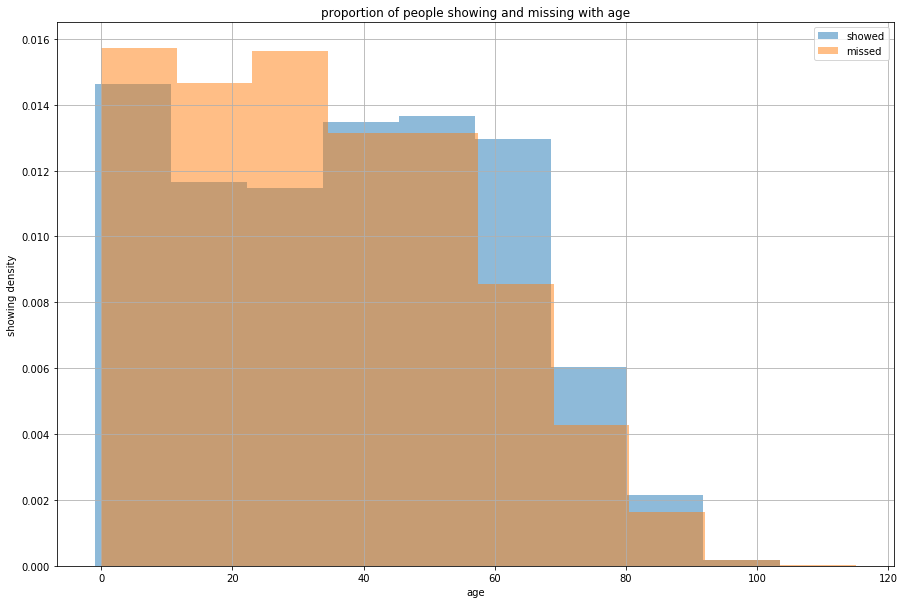

In [123]:
df[showed]['Age'].hist(alpha= 0.5, label = 'showed', density =True , figsize=(15,10))
df[missed]['Age'].hist(alpha= 0.5, label = 'missed', density = True, figsize=(15,10))
plt.ylabel('showing density')
plt.xlabel('age')
plt.title('proportion of people showing and missing with age')
plt.legend();

as shown in histogram the age range from 10 - 30 have higher opportunity to not show

### Research Question 3  (are the location of hospital makes big diffrance?)

lets group data by locations to find out

In [124]:
locations = df.groupby('Neighbourhood')['show'].mean()
locations.head()

Neighbourhood
AEROPORTO              0.875000
ANDORINHAS             0.769673
ANTÔNIO HONÓRIO        0.815498
ARIOVALDO FAVALESSA    0.780142
BARRO VERMELHO         0.784870
Name: show, dtype: float64

In [125]:
len(locations)

81

since there is alot of hospital locations its hard to show them in bar chart, but we will show them only to see general view 

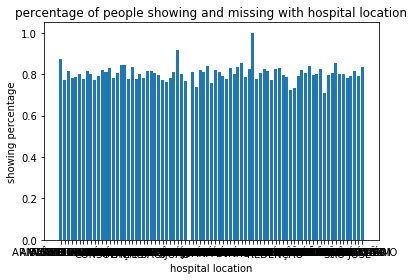

In [126]:
plt.bar(locations.index, locations)
plt.ylabel('showing percentage')
plt.xlabel('hospital location')
plt.title('percentage of people showing and missing with hospital location');

accourding to the bar chart there is not a huge defferance seen in persentage of showing, so the location of hospital don't have a big influence

<a id='conclusions'></a>
## Conclusions

in the end we can say from information that we gathered:
<ul>
 <li>people who have big differance between ScheduledDay and AppointmentDay (diff) tend to miss appointments  more than people who have less (diff), also sending sms help making them show </li>

 <li>the range of ages from 10 - 30 have higher chance to miss than other ages</li>

 <li>locations of hospital don't make that big differance </li>
</ul>
